## Visibilities for a point source

In [1]:
%load_ext autoreload
import sys
sys.path.insert(0,"/astro/u/chenzhi/imcurio")
import numpy as np
import imcurio as imc
import matplotlib.pyplot as plt
from copy import deepcopy
import time

In [4]:
%autoreload
B = imc.SimBox("/astro/u/chenzhi/imcurio/sims/HImesh_0512_z100.fits")
T=imc.TelSim()

Box size: 32.81-20.88 deg from z=0.72-1.33


In [5]:
## Let's put a source with unit flux at offset_x and offfset_y in degress
theta = 0.02
phi = 0.5
offset_x_rad = theta*np.cos(phi) 
offset_y_rad = theta*np.sin(phi) 
offset_xi = np.rint(offset_x_rad/B.Dpix_rad).astype(int)
offset_yi = np.rint(offset_y_rad/B.Dpix_rad).astype(int)

## now put this source in
B.box *= 0.0 ## set all pixels to zero




In [15]:
%autoreload
Bs = deepcopy(B)
Bs.box[offset_xi,offset_yi,np.arange(B.Nz)]=1  ##except our point source
T=imc.TelSim()
visPS = T.get_visibilities(Bs, None, vopts={'interpolation':'lasz'})
visPSlin = T.get_visibilities(Bs, None, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


In [7]:
%autoreload
Sc = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits')
T=imc.TelSim()
visDI = T.get_visibilities(B, Sc, vopts={'interpolation':'lin'})

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 


In [1]:
plt.figure(figsize=(10,10))
#plt.plot(np.real(visPS[:,10]))
#plt.plot(np.real(visPSlin[:,10]))
plt.plot(np.real(visDI[:, 300]))

NameError: name 'plt' is not defined

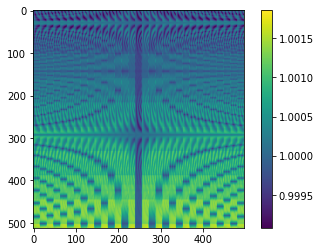

In [31]:
plt.imshow(np.real(visPS/visPSlin))
plt.colorbar()

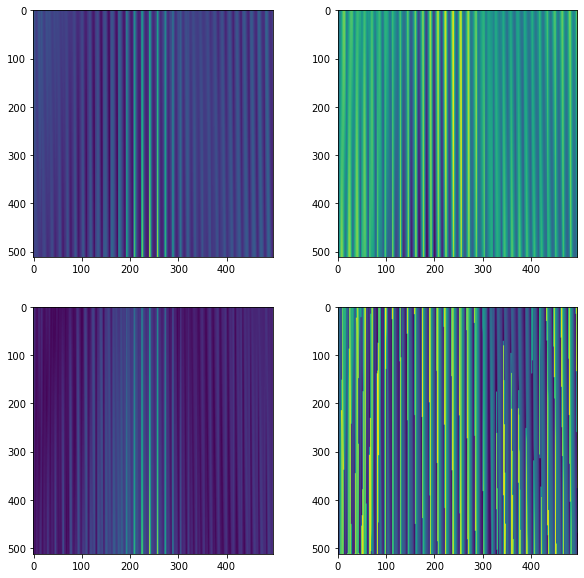

In [90]:
plt.figure(figsize=(10,10))
#plt.subplot(1,2,1)
#plt.imshow(np.abs(visPS))
plt.subplot(2,2,1)
plt.imshow(np.real(visDI))
plt.subplot(2,2,2)
plt.imshow(np.imag(visDI))
plt.subplot(2,2,3)
plt.imshow(np.abs(visDI))
plt.subplot(2,2,4)
plt.imshow(np.angle(visDI))

In [146]:
%autoreload
start = time.time()
Sc_test = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', set_range = np.arange(0,245453,1))
visDI_test = T.get_visibilities(B, Sc_test, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
16606.74485373497


In [15]:
plt.imshow(np.imag(visDI_test))
#plt.plot(np.real(visDI_test[:,200]))

NameError: name 'visDI_test' is not defined

In [10]:
%autoreload
#GLEAM covers 30 declination south
start = time.time()
high = 5.*np.pi/180.
low =  -5.*np.pi/180.
Sc_5 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', condition = (low,high))
visDI_5 = T.get_visibilities(B, Sc_5, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)


Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
1809.3782260417938


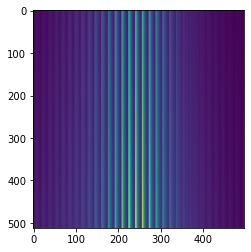

In [20]:
%autoreload
#GLEAM covers 30 declination south, so zenith ~ -30, need -50< x <-10 convert theta
start = time.time()
high = 10.*np.pi/180.
low =  -10.*np.pi/180.
Sc_10 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', condition = (low,high))
visDI_10 = T.get_visibilities(B, Sc_10, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
3678.25656914711


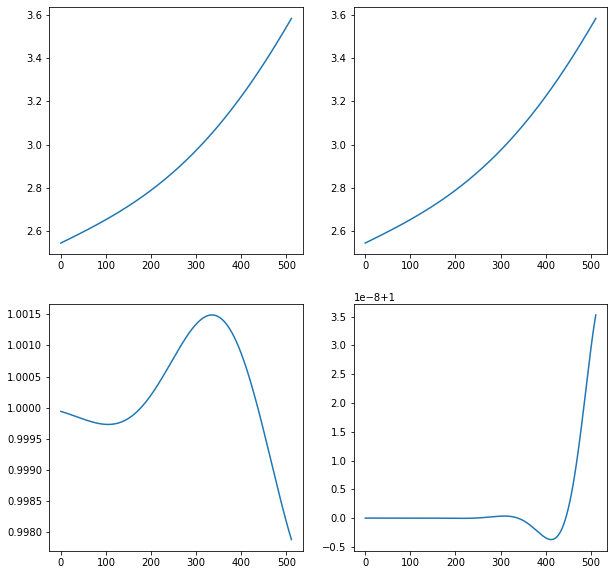

In [195]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
#plt.imshow(np.angle(visDI_10[:,:]))
#plt.colorbar()
plt.plot(np.real(visDI_all[:,30]))
plt.subplot(2,2,2)
#plt.imshow(np.angle(visDI_5[:,:]))
#plt.colorbar()
plt.plot(np.real(visDI_10[:,30]))
plt.subplot(2,2,3)
#ratio = np.angle(visDI_10)/np.angle(visDI_5)
#ratio[:240] = 0.
#plt.imshow(np.angle(visDI_10)/np.angle(visDI_15))
plt.plot(np.real(visDI_all[:,30])/np.real(visDI_5[:,30]))
plt.subplot(2,2,4)
plt.plot(np.real(visDI_all[:,30])/np.real(visDI_10[:,30]))
#plt.colorbar()

In [118]:
%autoreload
start = time.time()
high = 15.*np.pi/180.
low =  -15.*np.pi/180.
Sc_15 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', condition = (low,high))
visDI_15 = T.get_visibilities(B, Sc_15, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
5531.231235027313


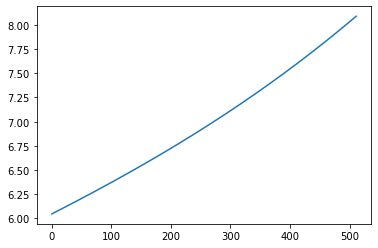

In [121]:
#plt.imshow(np.angle(visDI_15))
plt.plot(np.real(visDI_15[:,200]))

In [159]:
%autoreload
start = time.time()
#high = 15.*np.pi/180.
#low =  -15.*np.pi/180.
Sc_all = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits')
visDI_all = T.get_visibilities(B, Sc_all, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
15179.512651920319


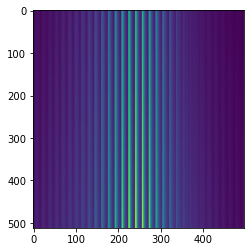

In [179]:
plt.imshow(np.real(visDI_all))
#plt.plot(np.real(visDI_all[:,200]))

In [147]:
%autoreload
start = time.time()
high = 5.*np.pi/180.
low =  -5.*np.pi/180.
position = -20.
Sc20_15 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', position= position, condition= (low,high))
visDI20_15 = T.get_visibilities(B, Sc20_15, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
1991.608325958252


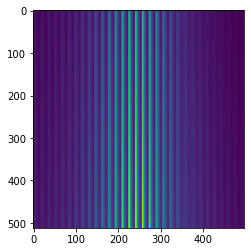

In [152]:
plt.imshow(np.real(visDI20_15))

In [153]:
%autoreload
start = time.time()
high = 10.*np.pi/180.
low =  -10.*np.pi/180.
position = -20.
Sc20_10 = imc.SourceCat('/astro/u/chenzhi/imcurio/sims/GLEAM_EGC_v2_trim.fits', position= position, condition= (low,high))
visDI20_10 = T.get_visibilities(B, Sc20_10, vopts={'interpolation':'lin'})
end = time.time()
print(end-start)

Beam sigma: 1.89-2.56 deg from z=0.72-1.33
Beam sigma at the edge: 8.67 - 4.07 
4059.090406179428


<ipython-input-158-c1e6e077920f>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.imag(visDI20_10)/np.imag(visDI20_15))


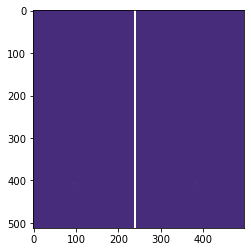

In [158]:
plt.imshow(np.imag(visDI20_10)/np.imag(visDI20_15))